In [42]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
keywordJson = "intents_new.json"
nonKeywordJson = "intents_newV2SiPalingClean.json"

In [3]:
patterns = []
tags = []

with open(keywordJson) as json_file:
    data = json.load(json_file)
    for intent in data['intents']:
        for pattern in intent['patterns']:
            patterns.append(pattern)
            tags.append(intent['tag'])

dfWithKeyword = pd.DataFrame({'tag': tags, 'pattern': patterns})

<AxesSubplot:xlabel='tag'>

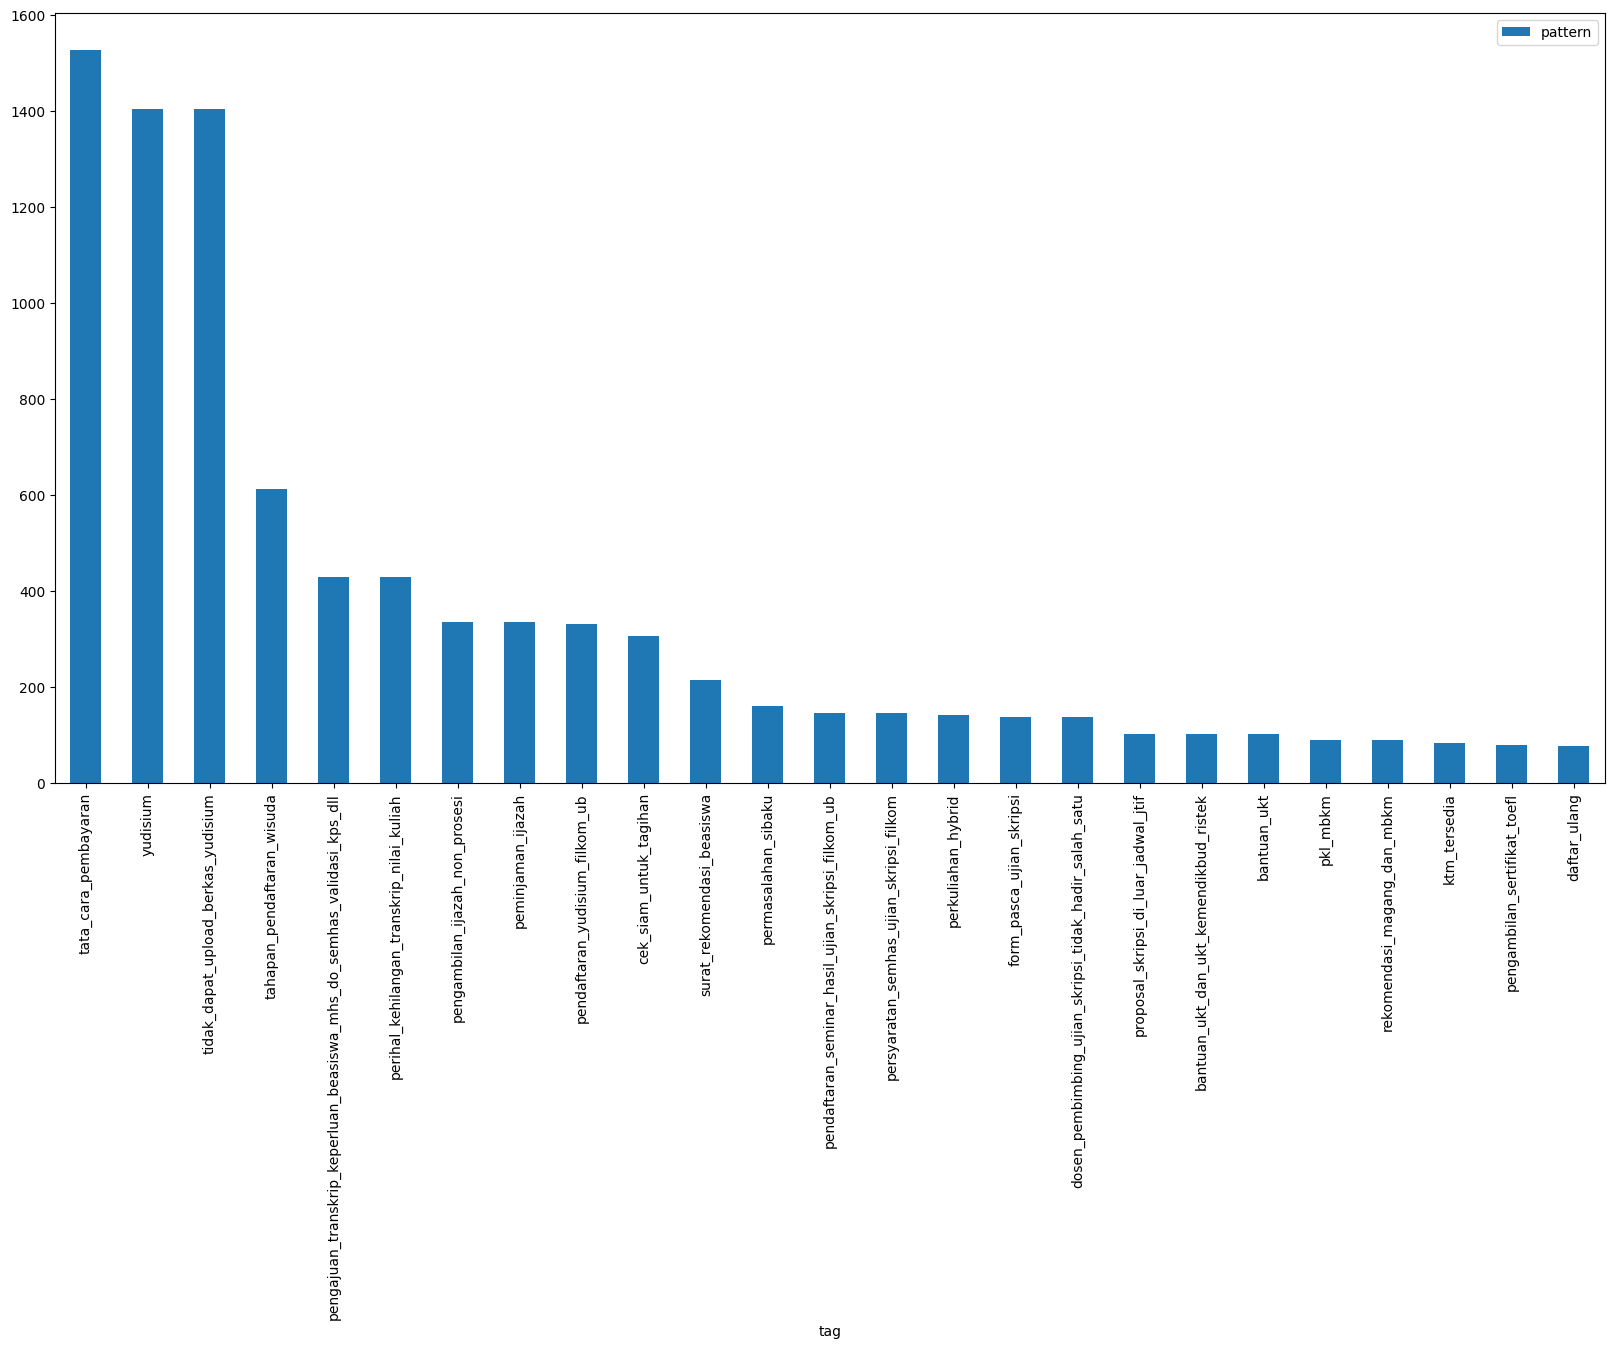

In [8]:
# plot count of each tag group
dfWithKeywordAggregated = dfWithKeyword.groupby('tag').count().sort_values('pattern', ascending=False)
dfWithKeywordAggregated.head(25).plot(kind='bar', figsize=(20, 10))

In [5]:
patterns = []
tags = []

with open(nonKeywordJson) as json_file:
    data = json.load(json_file)
    for intent in data['intents']:
        for pattern in intent['patterns']:
            patterns.append(pattern)
            tags.append(intent['tag'])

dfWithoutKeyword = pd.DataFrame({'tag': tags, 'pattern': patterns})

<AxesSubplot:xlabel='tag'>

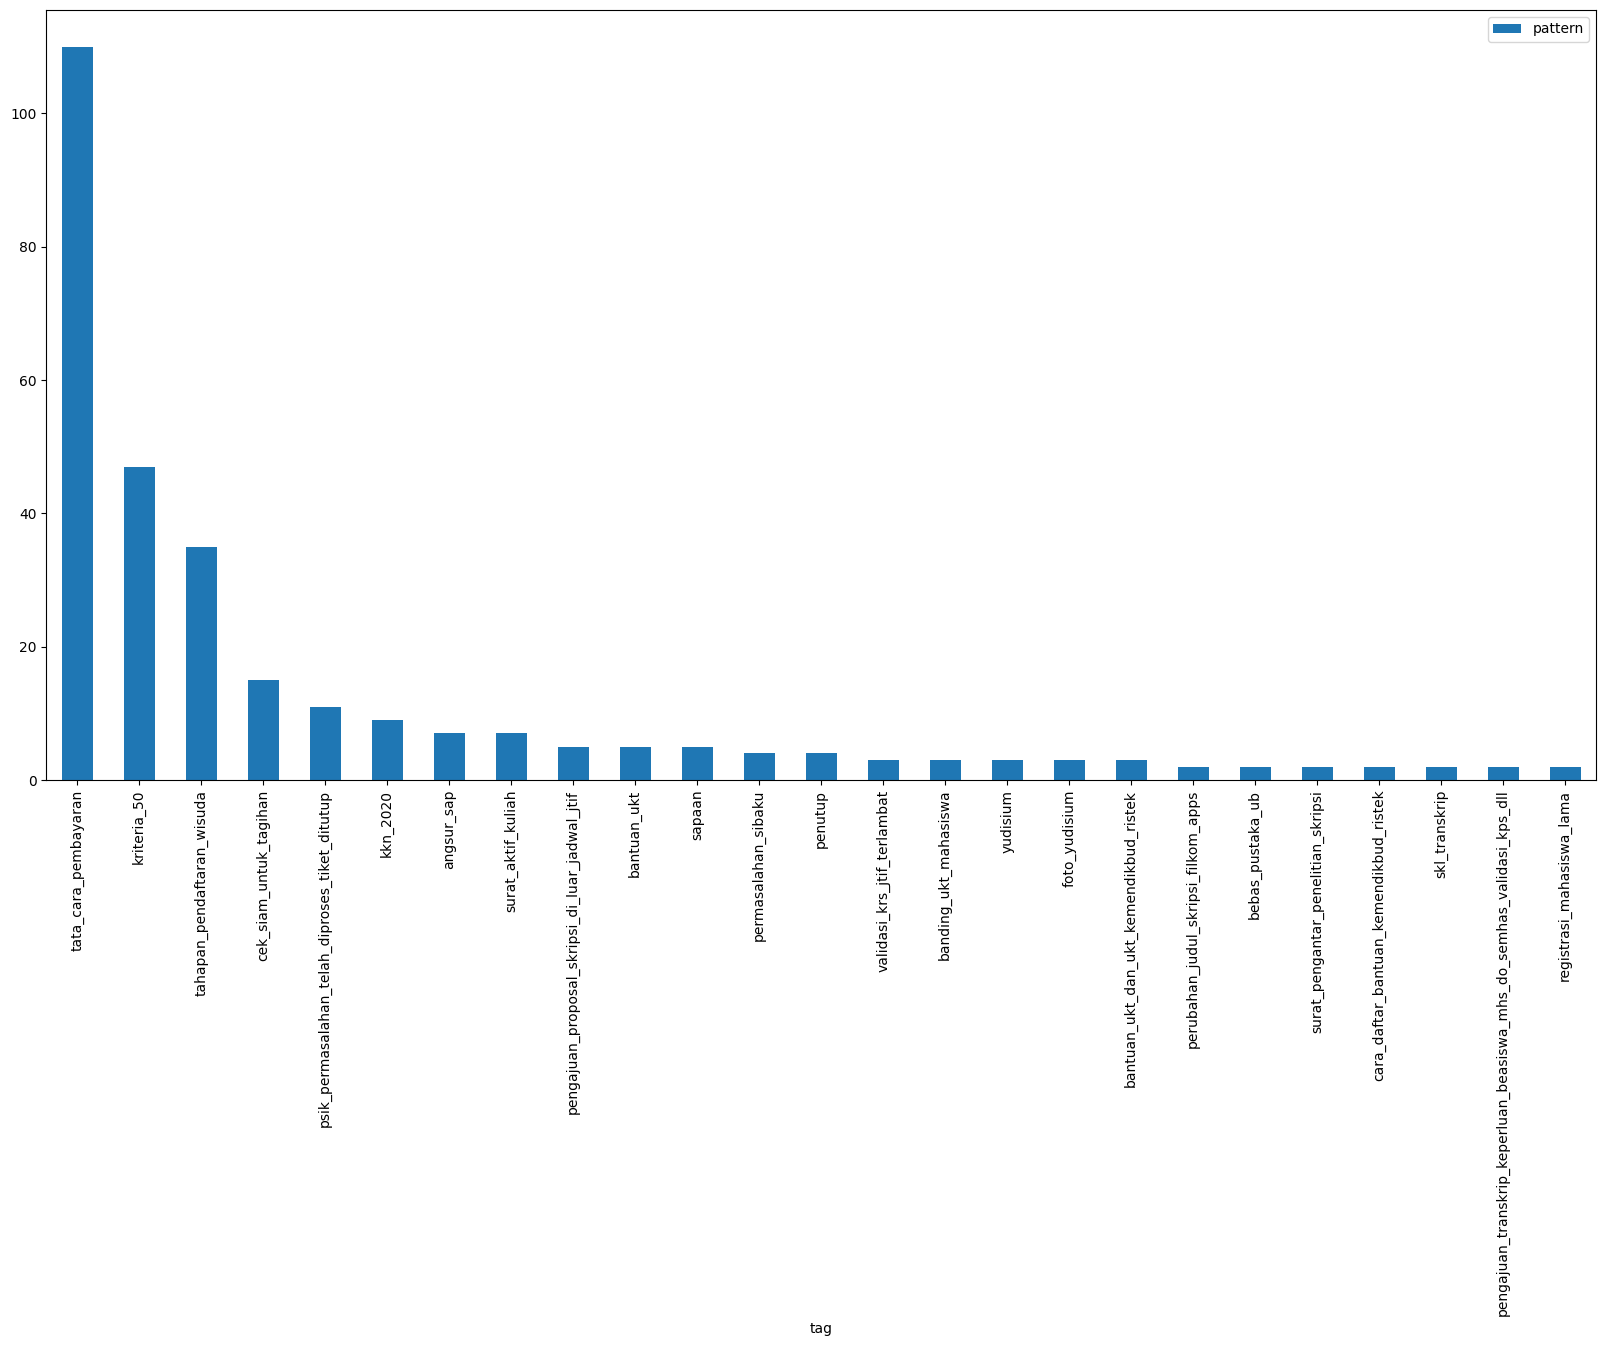

In [9]:
dfWithoutKeywordAggregated = dfWithoutKeyword.groupby('tag').count().sort_values('pattern', ascending=False)
dfWithoutKeywordAggregated.head(25).plot(kind='bar', figsize=(20, 10))

In [19]:
listTags = pd.read_csv('keywords_n2.csv')
listTags['topik'] = listTags['topik'].apply(lambda x: x.replace(' ', '_'))
listTags = listTags['topik'].to_list()

In [72]:
dfCountEachIntent = pd.DataFrame(columns=['tag', 'countWithKeyword', 'countWithoutKeyword','total'])

for tag in listTags:
    try:
        countWithKeyword = dfWithKeywordAggregated.loc[tag]['pattern']
    except:
        countWithKeyword = 0

    try:
        countWithoutKeyword = dfWithoutKeywordAggregated.loc[tag]['pattern']
    except:
        countWithoutKeyword = 0

    # add data to df
    dfCountEachIntent = dfCountEachIntent.append({'tag': tag, 'countWithKeyword': countWithKeyword, 'countWithoutKeyword': countWithoutKeyword, 'total':countWithKeyword+countWithoutKeyword}, ignore_index=True)


In [73]:
dfCountEachIntent

,tag,countWithKeyword,countWithoutKeyword,total
0,pengajuan_bantuan,37,0,37
1,pencairan_saldo_ukt,17,0,17
2,cek_siam_untuk_tagihan,307,15,322
3,kriteria_50,0,47,47
4,registrasi_mahasiswa_lama,0,2,2
...,...,...,...,...
119,alur_pasca_ujian_skripsi,1,0,1
120,mhs_kritis_ujian_sblm_21072022_yudisium,0,0,0
121,ujian_skripsi_20212__pendaftaran_yudisium_non_...,0,0,0
122,templates_dtif,0,0,0


In [74]:
# change tag column to index
dfCountEachIntent = dfCountEachIntent.set_index('tag')

In [75]:
# sort from dfWithKeywordAggregated values
dfCountEachIntent.sort_values('total', ascending=True, inplace=True)

<AxesSubplot:title={'center':'Count of each intent'}, ylabel='tag'>

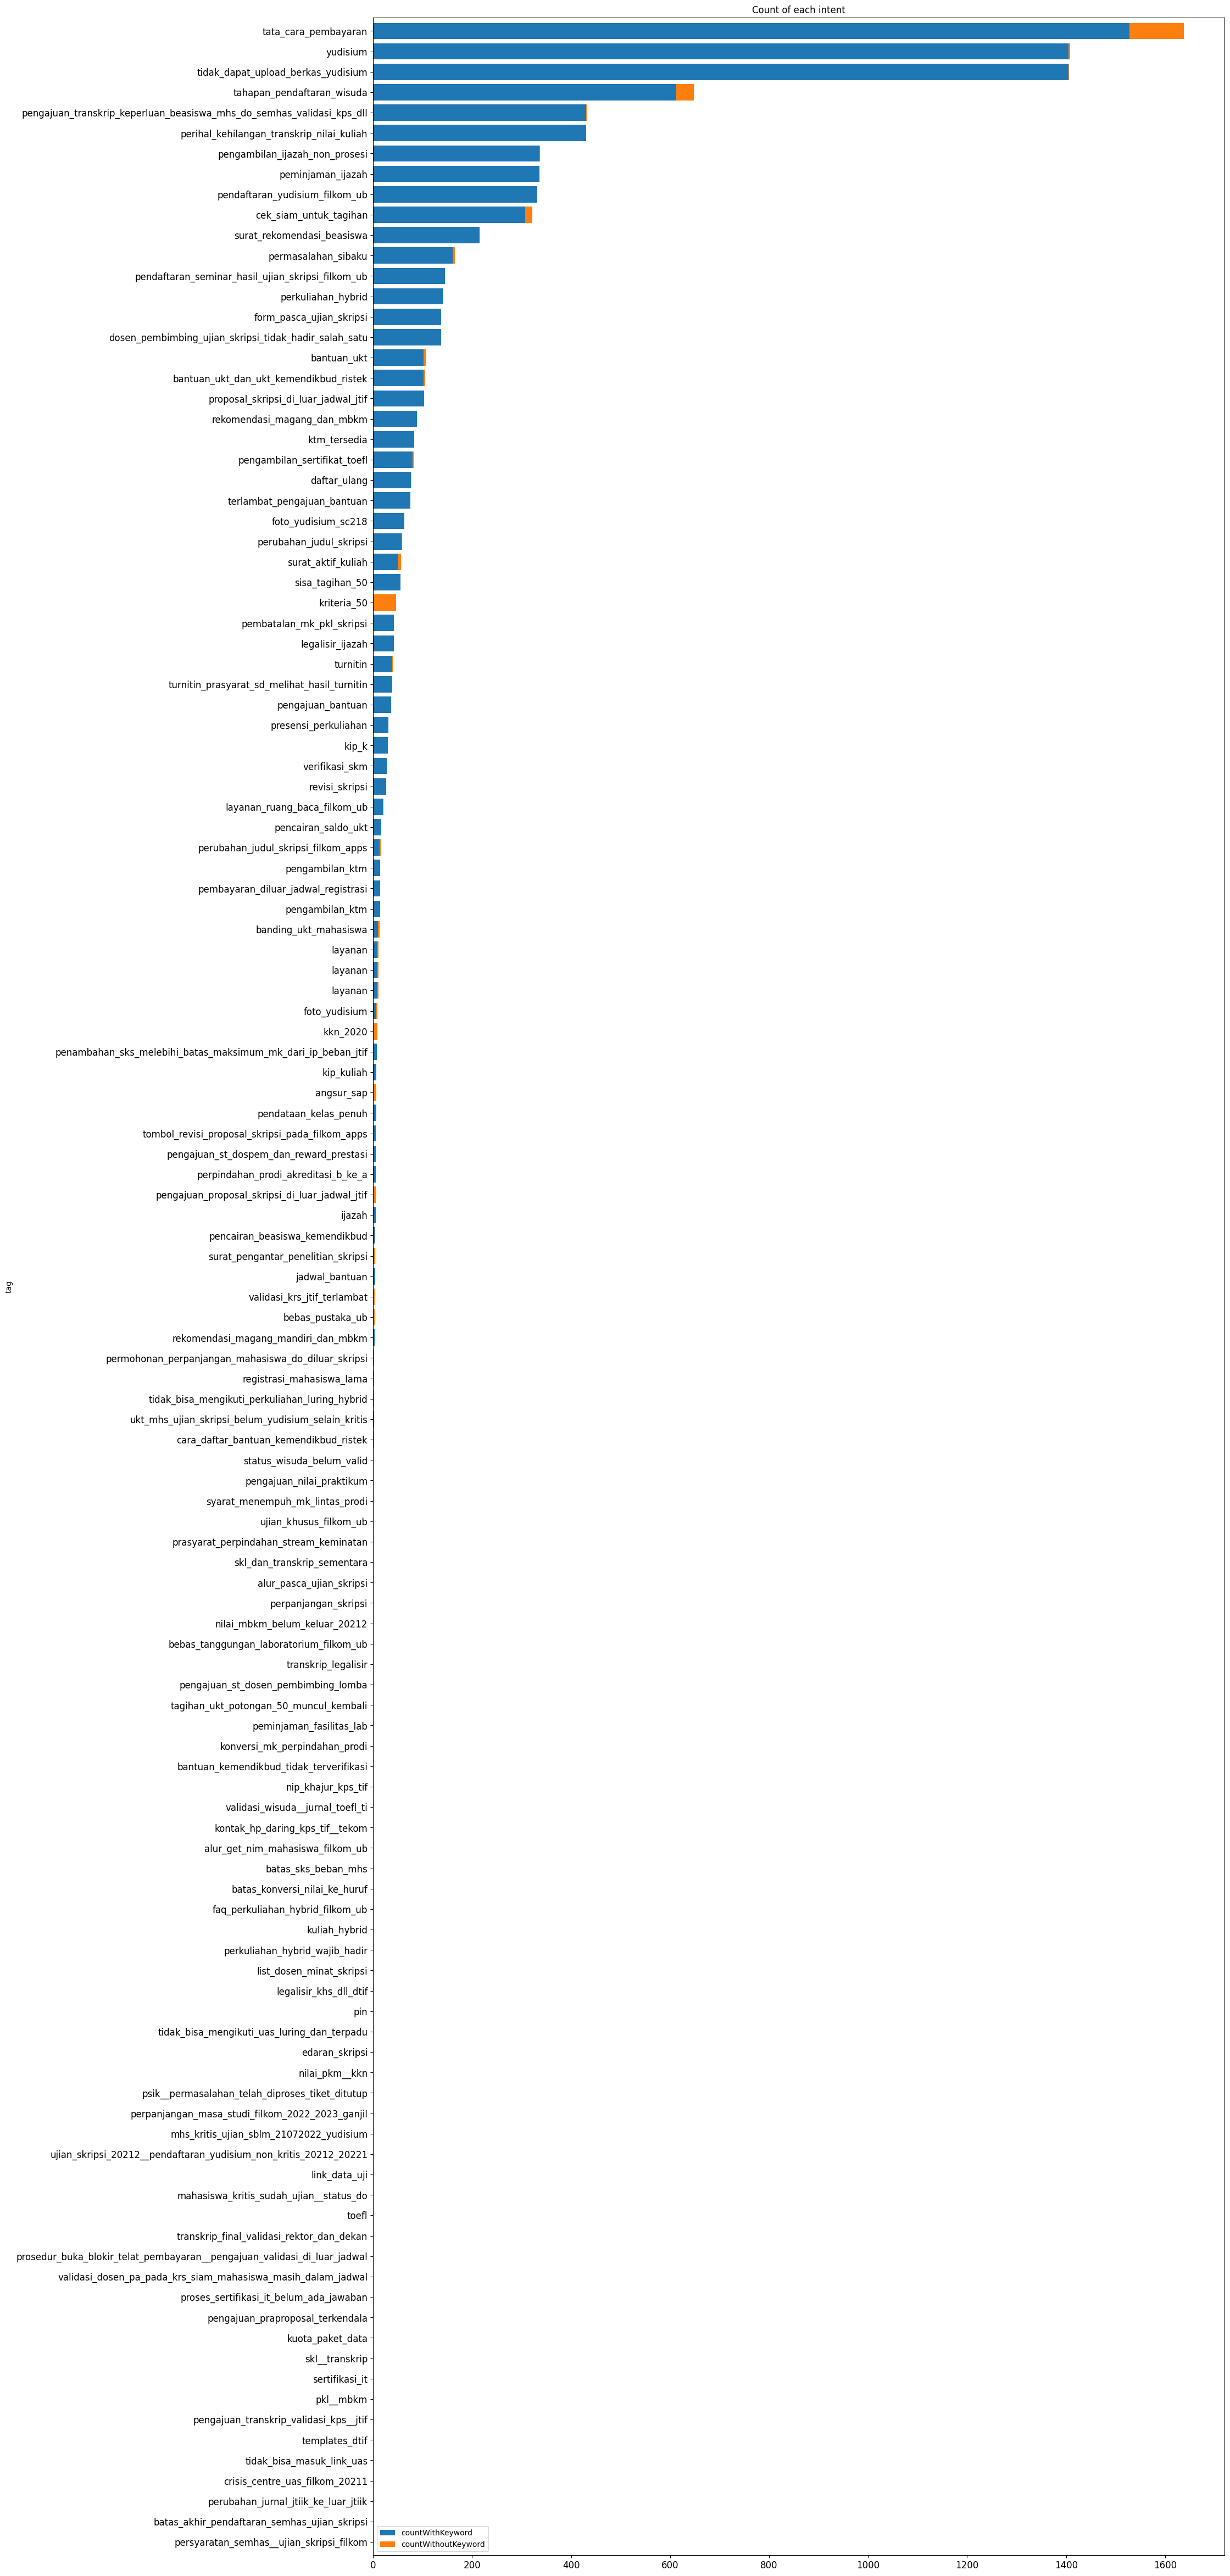

In [78]:
# put legend on upper right and annotate the value
dfCountEachIntent.drop(columns=['total']).plot(kind='barh', figsize=(20, 60), title='Count of each intent', legend=True, stacked=True, fontsize=12, width=0.8)
